In [67]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import os, sys
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [90]:
data_folder = r'../../data'
scrna = os.path.join(data_folder, 'temp_objects', 'seq_reference_00.h5ad')

In [70]:
adata = sc.read(scrna)

In [71]:
adata.obs = adata.obs[[i for i in adata.obs.columns if 'pANN' not in i]]
adata.obs = adata.obs[[i for i in adata.obs.columns if 'DF.classifications' not in i]]

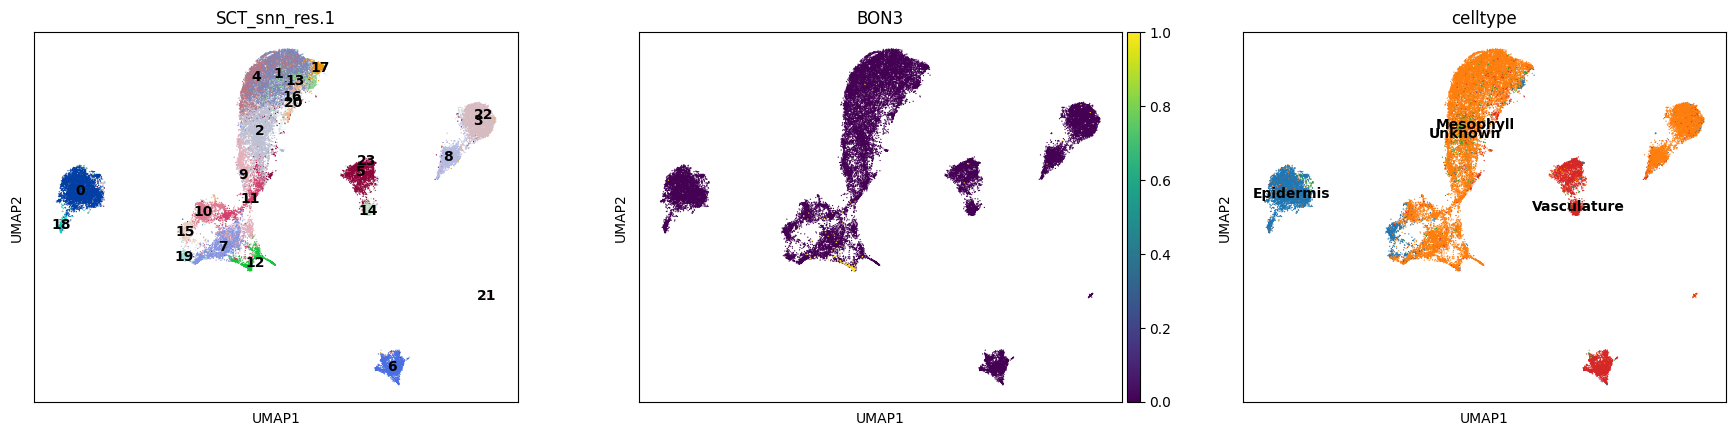

In [72]:
sc.pl.umap(adata, color=['SCT_snn_res.1', 'BON3', 'celltype'], vmax=1, legend_loc= 'on data')

In [73]:
adata = adata[(adata.obs['celltype'].isin(['Mesophyll']))]
adata.obs_names_make_unique()


In [74]:
adata.raw=adata

In [75]:
sc.pp.recipe_zheng17(adata)

In [76]:
sc.tl.pca(adata, random_state=0)

In [77]:
sc.pp.neighbors(adata, random_state=0)

In [78]:
sc.tl.umap(adata, random_state=0)

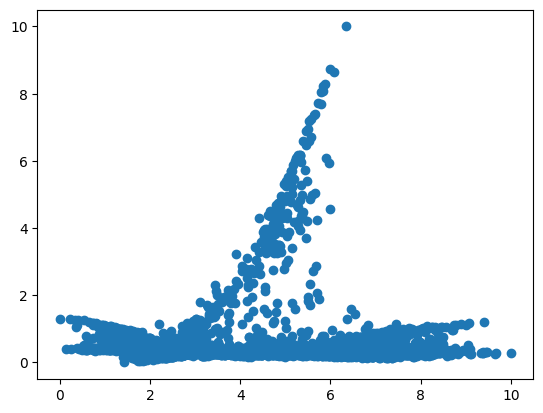

In [79]:
plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1])

In [80]:
mock_indices = np.where(adata.obs['sample'].isin(['00_Mock_rep1', '00_Mock_rep2']))[0]
pseudotimes =[]
for idx in mock_indices:
    adata.uns['iroot'] = idx
    sc.tl.dpt(adata, n_dcs=2)
    pseudotime = adata.obs['dpt_pseudotime']
    pseudotimes.append(pseudotime)

In [81]:
adata.obs['dpt_pseudotime'] = np.mean(np.vstack([i.values for i in pseudotimes]), axis = 0)

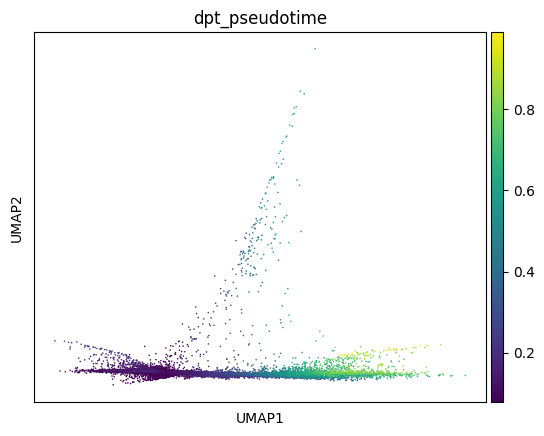

In [84]:
sc.pl.umap(adata, color='dpt_pseudotime')

##### Add the pseudotime to the scRNA object without subsetting to only Mesophyll

In [85]:
scrna_copy = sc.read(scrna)

In [86]:
scrna_copy.obs = scrna_copy.obs[[i for i in scrna_copy.obs.columns if 'pANN' not in i]]
scrna_copy.obs = scrna_copy.obs[[i for i in scrna_copy.obs.columns if 'DF.classifications' not in i]]

In [87]:
scrna_copy.obs = scrna_copy.obs.merge(adata.obs.dpt_pseudotime, left_index=True, right_index=True, how='left')

In [91]:
scrna_copy.write(os.path.join(data_folder, 'temp_objects', 'seq_pseudotime_01.h5ad'))